In [25]:
import numpy as np
import matplotlib.pyplot as plt
import networkx
import importlib
import quasibi
from tqdm import tqdm
importlib.reload(quasibi);

# Surrogate Convergence

This script looks at the convergence of surrogate networks based on changes in the degree centrality.

In [77]:
Smax = 500

In [78]:
# load the distance matrix
D = quasibi.load_symmat("../output/distance.npy")

In [79]:
pearson = quasibi.load_symmat("../output/pearson_correlation_matrix.npy")

# threshold with 0.5% link density
pearson = np.abs(pearson) > np.quantile(np.abs(pearson), 0.995)

In [80]:
pearson_surrogates = quasibi.create_surrogate_adjacency_matrix(pearson, D, Smax)
pearson_surrogates.shape

(500, 1000, 1000)

In [81]:
m = []

for i in tqdm(np.arange(10, Smax, 10)):

    # take the average of the last i surrogates
    mp = quasibi.network_metric(np.mean(pearson_surrogates[0:i], axis=0), quasibi.degree_centrality)
    mn = quasibi.network_metric(np.mean(pearson_surrogates[0:(i + 10)], axis=0), quasibi.degree_centrality)

    m.append(np.mean(np.abs(mp - mn)))

100%|██████████| 49/49 [00:53<00:00,  1.09s/it]


[]

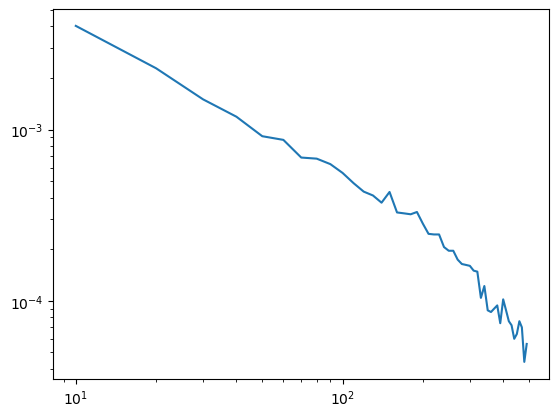

In [86]:
plt.plot(np.arange(10, Smax, 10), m)
plt.loglog()